# The results for the 4 node graph

In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

# Function to load all results of a given type
def load_results(base_path, regex):
    results = []
    for filename in os.listdir(base_path):
        if bool(re.match(regex, filename)):
            with open(os.path.join(base_path, filename), 'rb') as file:
                results.append(pickle.load(file))
    return results

# Function to compute statistics across runs
def aggregate_results(results, key):
    all_data = [res[key][2:] for res in results if key in res]

    mean_data = np.mean(all_data, axis=0)
    std_dev_data = np.std(all_data, axis=0)
    return mean_data, std_dev_data


def plot_everything(base_path, experiment):
    # CEO results
    ceo_results = load_results(base_path, r'.*_ceo.*\.pickle')
    ceo_mean, ceo_std = aggregate_results(ceo_results, experiment)

    # BO results
    bo_results = load_results(base_path, r'.*_bo.*\.pickle')
    bo_mean, bo_std = aggregate_results(bo_results, experiment)

    # CBO results for each graph (no loop, hard-coded as requested)
    cbo_graph0_results = load_results(base_path, r'.*_cbo.*graph_1.*\.pickle')
    cbo_graph0_mean, cbo_graph0_std = aggregate_results(cbo_graph0_results, experiment)

    cbo_graph1_results = load_results(base_path, r'.*_cbo.*graph_1.*\.pickle')
    cbo_graph1_mean, cbo_graph1_std = aggregate_results(cbo_graph1_results, experiment)

    cbo_graph2_results = load_results(base_path, r'.*_cbo.*graph_2.*\.pickle')
    cbo_graph2_mean, cbo_graph2_std = aggregate_results(cbo_graph2_results, experiment)

    cbo_graph3_results = load_results(base_path, r'.*_cbo.*graph_3.*\.pickle')
    cbo_graph3_mean, cbo_graph3_std = aggregate_results(cbo_graph3_results, experiment)

    cbo_graph4_results = load_results(base_path, r'.*_cbo.*graph_4.*\.pickle')
    cbo_graph4_mean, cbo_graph4_std = aggregate_results(cbo_graph4_results, experiment)

    cbo_graph5_results = load_results(base_path, r'.*_cbo.*graph_5.*\.pickle')
    cbo_graph5_mean, cbo_graph5_std = aggregate_results(cbo_graph5_results, experiment)

    cbo_graph6_results = load_results(base_path, r'.*_cbo.*graph_6.*\.pickle')
    cbo_graph6_mean, cbo_graph6_std = aggregate_results(cbo_graph6_results, experiment)

    cbo_true_graph_results = load_results(base_path, r'.*_cbo.*true_graph.*\.pickle')
    cbo_true_graph_mean, cbo_true_graph_std = aggregate_results(cbo_true_graph_results, experiment)


    # Plotting results using fill_between
    x_values = range(len(ceo_mean))
    plt.fill_between(x_values, ceo_mean - ceo_std, ceo_mean + ceo_std, alpha=0.2)
    plt.plot(x_values, ceo_mean, label='CEO Mean')

    x_values = range(len(bo_mean))
    plt.fill_between(x_values, bo_mean - bo_std, bo_mean + bo_std, alpha=0.2)
    plt.plot(x_values, bo_mean, label='BO Mean')

    x_values = range(len(cbo_graph0_mean))
    plt.fill_between(x_values, cbo_graph0_mean - cbo_graph0_std, cbo_graph0_mean + cbo_graph0_std, alpha=0.2)
    plt.plot(x_values, cbo_graph0_mean, label='CBO Graph 0')

    x_values = range(len(cbo_graph1_mean))
    plt.fill_between(x_values, cbo_graph1_mean - cbo_graph1_std, cbo_graph1_mean + cbo_graph1_std, alpha=0.2)
    plt.plot(x_values, cbo_graph1_mean, label='CBO Graph 1')

    x_values = range(len(cbo_graph2_mean))
    plt.fill_between(x_values, cbo_graph2_mean - cbo_graph2_std, cbo_graph2_mean + cbo_graph2_std, alpha=0.2)
    plt.plot(x_values, cbo_graph2_mean, label='CBO Graph 2')

    x_values = range(len(cbo_graph3_mean))
    plt.fill_between(x_values, cbo_graph3_mean - cbo_graph3_std, cbo_graph3_mean + cbo_graph3_std, alpha=0.2)
    plt.plot(x_values, cbo_graph3_mean, label='CBO Graph 3')

    x_values = range(len(cbo_true_graph_mean))
    plt.fill_between(x_values, cbo_true_graph_mean - cbo_true_graph_std, cbo_true_graph_mean + cbo_true_graph_std, alpha=0.2)
    plt.plot(x_values, cbo_true_graph_mean, label='CBO true')

    plt.title('Mean and Standard Deviation of Best Y across Runs')
    plt.xlabel('Trial')
    plt.ylabel('Best Y')
    plt.legend()
    plt.show()


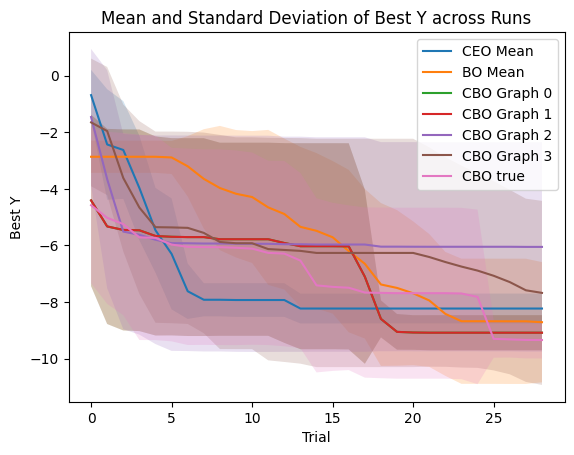

In [4]:
# Load results for each experiment type
base_path = 'Graph4'
plot_everything(base_path, 'Best_Y')

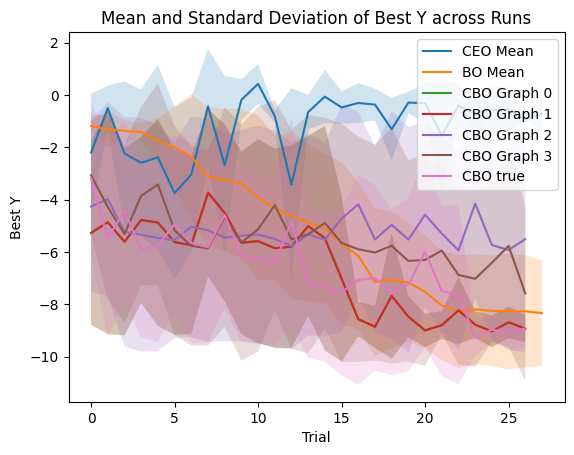

In [5]:
# Load results for each experiment type
plot_everything(base_path, 'Per_trial_Y')